In [31]:
import warnings
warnings.filterwarnings(action='ignore')
import requests
# from bs4 import BeautifulSoup # html 문서를 파싱할 때 사용하므로 AJAX로 넘어오는 데이터를 크롤링 할 때 사용하지 않는다.
from datetime import datetime as dt
import json # json 형태의 문자열을 파이썬에서 처리하기 위해 loads() 메소드로 리스트나 딕셔너리 형태로 변환한다.

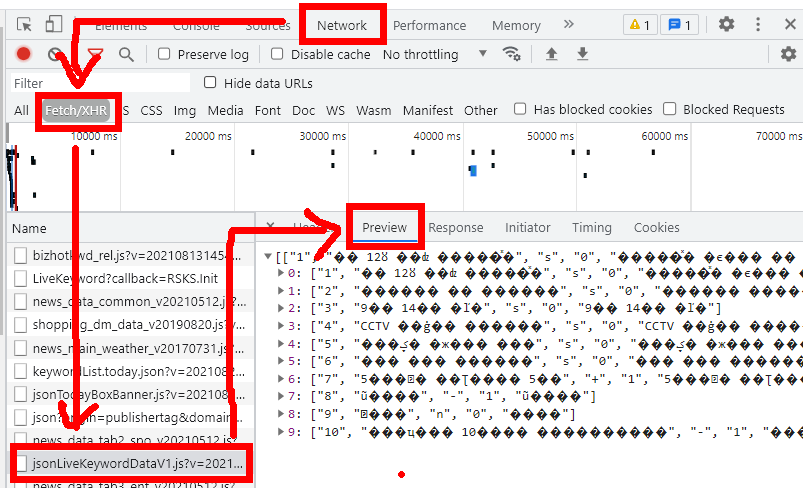

In [32]:
from IPython.display import Image
Image('./nateAjax.png', width='800')

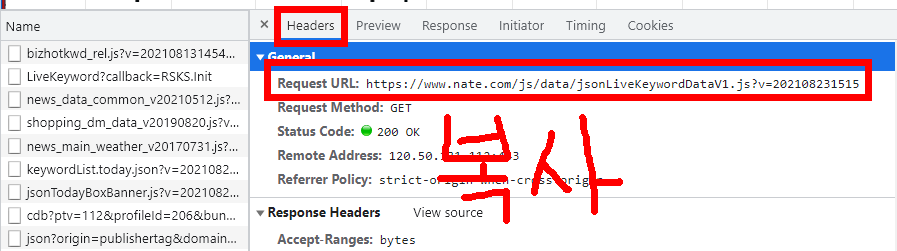

In [33]:
from IPython.display import Image
Image('./nateAjax2.png', width='800')

In [34]:
# 실시간 검색어가 웹 페이지에 전부 혹인 일부가 포함되어있지 않고 ajax를 이용해 받아오는 방식이 사용된다.
# Request Method가 GET 이므로 requests 모듈의 get() 메소드를 사용해서 실시간 검색어를 받아온다.
targetSite = 'https://www.nate.com/js/data/jsonLiveKeywordDataV1.js?v=202108231520'
request = requests.get(targetSite)
print(request)
# 파이썬은 한글 encoding이 유니코드(UTF-8)로 되어있기 때문에 'euc-kr'로 encoding 되어있는 사이트를 크롤링 할 때 한글이 깨지면
# 아래와 같이 한글 encoding을 바꿔준다.
request.encoding = 'euc-kr'

<Response [200]>


In [35]:
issues = request.text
print(type(issues))
print(issues)

<class 'str'>
[["1",  "태풍 오마이스 남해안",  "s",  "0",  "태풍 오마이스 남해안"], ["2",  "수술실 CCTV 통과",  "+",  "1",  "수술실 CCTV 통과"], ["3",  "최성봉",  "+",  "1",  "최성봉"], ["4",  "저소득층 추가 국민지원금",  "+",  "1",  "저소득층 추가 국민지원금"], ["5",  "노는 브로 올림픽",  "+",  "1",  "노는 브로 올림픽"], ["6",  "악마판사",  "+",  "1",  "악마판사"], ["7",  "불안 금융위 계속",  "+",  "1",  "불안 금융위 계속"], ["8",  "헤일리 앳웰",  "n",  "0",  "헤일리 앳웰"], ["9",  "식당 로또가 2등",  "+",  "1",  "식당 로또가 2등"], ["10",  "돌싱글즈",  "+",  "1",  "돌싱글즈"]]


In [36]:
# json 문자열 형태로 얻어온 실시간 이슈 키워드는 json 모듈의 loads() 메소드를 사용해서 파이썬에서 처리할 수 있느느 데이터
# 타입으로 변환시켜 처리한다.
# loads() 메소드는 json 타입의 문자열이 {}를 포함하는 형태면 딕셔너리로 []만 포함하는 형태면 리스트로 자동 변환시킨다.
ranks = json.loads(issues)
print(type(ranks))
print(ranks)

<class 'list'>
[['1', '태풍 오마이스 남해안', 's', '0', '태풍 오마이스 남해안'], ['2', '수술실 CCTV 통과', '+', '1', '수술실 CCTV 통과'], ['3', '최성봉', '+', '1', '최성봉'], ['4', '저소득층 추가 국민지원금', '+', '1', '저소득층 추가 국민지원금'], ['5', '노는 브로 올림픽', '+', '1', '노는 브로 올림픽'], ['6', '악마판사', '+', '1', '악마판사'], ['7', '불안 금융위 계속', '+', '1', '불안 금융위 계속'], ['8', '헤일리 앳웰', 'n', '0', '헤일리 앳웰'], ['9', '식당 로또가 2등', '+', '1', '식당 로또가 2등'], ['10', '돌싱글즈', '+', '1', '돌싱글즈']]


In [37]:
for rank in ranks:
    print('{0:>2s}위: {1}'.format(rank[0], rank[1]), end='')
    if rank[2] == '+':
        print('[{}{}]'.format('↑', rank[3]))
    elif rank[2] == '-':
        print('[{}{}]'.format('↓', rank[3]))
    elif rank[2] == 's':
        print('[-]')
    else:
        print('[new]')

 1위: 태풍 오마이스 남해안[-]
 2위: 수술실 CCTV 통과[↑1]
 3위: 최성봉[↑1]
 4위: 저소득층 추가 국민지원금[↑1]
 5위: 노는 브로 올림픽[↑1]
 6위: 악마판사[↑1]
 7위: 불안 금융위 계속[↑1]
 8위: 헤일리 앳웰[new]
 9위: 식당 로또가 2등[↑1]
10위: 돌싱글즈[↑1]
